10.27~11.17

In [153]:
# 10.27, Scikit-Learn, 단순선형회귀, Scikit-Learn의 선형회귀
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
X = np.arange(10).reshape(10,1)

In [155]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [156]:
y = np.array([-1,2,3,5,4,7,6,6,9,9])

In [157]:
X.shape

(10, 1)

In [158]:
y.shape

(10,)

In [159]:
y

array([-1,  2,  3,  5,  4,  7,  6,  6,  9,  9])

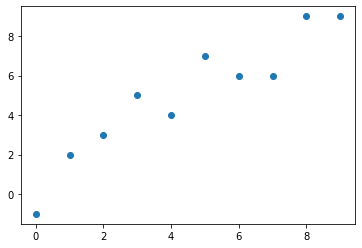

In [160]:
plt.scatter(X,y)

In [161]:
# import 모듈 : 모듈 전체
# from 모듈 import 이름 : 모듈 내에서 필요한 것만 콕 찍어서 가져오는 방법

from sklearn.linear_model import LinearRegression

In [162]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [163]:
reg.coef_ # 기울기 : .coef_

array([0.96969697])

In [164]:
reg.intercept_ # 절편 : .intercept_

0.6363636363636358

In [165]:
pred = reg.predict(X) # predict() 메서드에 예측하고 싶은 데이터 배열을 전달하면 데이터 수만큼 예측결과를 리턴

In [166]:
pred 

array([0.63636364, 1.60606061, 2.57575758, 3.54545455, 4.51515152,
       5.48484848, 6.45454545, 7.42424242, 8.39393939, 9.36363636])

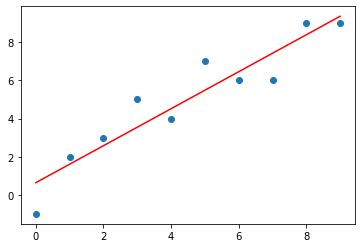

In [167]:
plt.scatter(X,y)
plt.plot(X,pred,color='r') # 안에 파라미터로 그래프 그림

In [168]:
reg2 =LinearRegression(fit_intercept=False) 
# 절편 없음 : 원점을 지나는 회귀, fit_intercept 인수는 모형에 상수항이 있는가 없는가를 결정하는 함수

In [169]:
reg2.fit(X,y)

LinearRegression(fit_intercept=False)

In [170]:
pred2=reg2.predict(X)

In [171]:
reg2.coef_

array([1.07017544])

In [172]:
reg2.intercept_

0.0

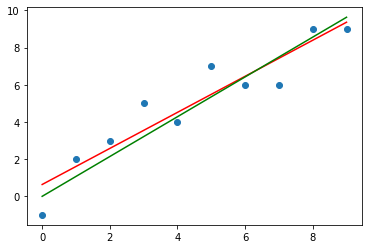

In [173]:
plt.scatter(X,y)
plt.plot(X,pred,color='r')
plt.plot(X,pred2,color='g')

In [174]:
reg.score(X,y) # 결정 계수 (R^2) : 1에 가까울수록 좋다

0.8815426997245179

In [175]:
reg2.score(X,y)

0.8682216905901117

In [176]:
# 11.1 ~ 11.3, 지도학습, 분류(classification), 불꽃(iris) 데이터, 로지스틱 회귀를 사용한 분류

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None) # header : 열 이름(헤더)으로 사용할 행 지정 / 첫 행이 헤더가 아닌 경우 header = None 

In [179]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [180]:
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] # 각각의 특성(feature) 대입
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [181]:
df.tail()

,sepal length,sepal width,petal length,petal width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [182]:
X = df.drop('species', axis=1).to_numpy() # axis=0 행 방향, axis = 1 열 방향, .to_numpy : pandas 객체를 numpy 배열 객체인 ndarray로 반환 
y = df['species'].to_numpy() # Series에서 ndarray 필요한 상황일 때 to_numpy() 사용
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2)) # np.where(condition, T, F) 값 변경

y2 = df['species'].to_numpy() # 내가 테스트 해본거 그냥, 종류가 3개인가? 해서, tail(80) 해서 보니까 종류 3개 맞네
y2 = np.where(y2 == 'Iris-versicolor', 1,2) # 내가 테스트 해본거 그냥,

In [183]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [184]:
y2 # 그냥 내가 테스트한거

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [185]:
X = X[:, [2, 3]] # petal length, petal width 2개 사용하겠다는 소리

In [186]:
X.shape # df.shape : (행, 열) 순서로 출력

(150, 2)

In [187]:
y.shape

(150,)

### stratify : default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

In [189]:
# 데이터의 분할 : 훈련용 vs 테스트용
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y) # train_size : 학습 데이터의 비율, stratify : 지정한 Data의 비율을 유지한다. 
pd.Series(y_train).value_counts() # value_counts()는 어떤 컬럼/Series의 unique value들을 count
# Series 정의할 때, pd.Series()함수 이용, index와 values 동시 확인, 이런걸 계층 샘플링 이라고 말함.
# 이거 훈련 세트 사이즈 지정한대로 잘 나눠졌는지 확인하려고 한 느낌인데, y_train은 되고 X_train은 왜 안될까?
# 강의 확인 : y_train의 비율을 알고싶어서 한거

0    35
1    35
2    35
dtype: int64

In [190]:
pd.Series(y_test).value_counts()

0    15
1    15
2    15
dtype: int64

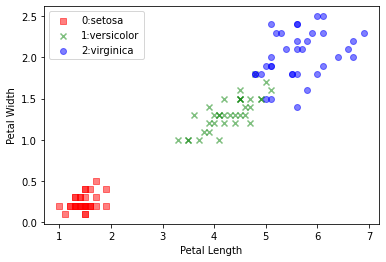

In [197]:
# 데이터 시각화, x 축 : 꽃잎의 길이, y 축 : 꽃잎의 너비, 각 점의 색깔을 품종마다 다르게 표시, 훈련용 데이터
ax = plt.axes() # Axes : 보통 plot으로 생각하는 하나의 그래프
markers = ['s','x','o']
colors = ['r','g','b']
labels = ['0:setosa', '1:versicolor', '2:virginica']
for i in range(3):
    X_sub = X_train[y_train == i] # 열 단위로 마스킹, X_train에서 y_train이 i인 애들 뽑겠다는 소리
    ax.scatter(X_sub[:,0], X_sub[:,1], alpha=0.5, marker = markers[i], c=colors[i], label = labels[i])
    ax.set(xlabel='Petal Length', ylabel = 'Petal Width')
    ax.legend()

In [198]:
# 데이터 표준화 : 특성별로 데이터의 스케일이 다르다면, 머신러닝이 잘 동작하지 않을 수 있다. 
# 그래서 데이터 스케일링 작업을 통해, 모든 특성의 범위(또는 분포)를 같게 만들어줘야합니다.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # 각 열별 평균과 표준 편차를 일단 계산만 해준다.

StandardScaler()

In [199]:
X_train_std = sc.transform(X_train) # 이 값들을 이용해서 여기서 변환을 해준다.
X_test_std = sc.transform(X_test)

In [203]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_std, y_train) # y_train은 만들지도 않고, 원래 표준화 하는거 아님

LogisticRegression()

In [209]:
logistic.predict(X_train_std[:3,:]) #  [:,:] 쓰면 105개 3:1 비율로 잘 나눠짐, 여기서는 그냥 3개만 본거임

array([0, 0, 2])

In [210]:
y_train[:3]

array([0, 0, 2])

In [212]:
logistic.predict_proba(X_train_std[:3,:]) # predict_proba()클래스 확률을 예측하는 데 사용
                                          # predict()실제 클래스를 예측하는 데 사용

array([[9.59543959e-01, 4.04522758e-02, 3.76537919e-06],
       [9.40769396e-01, 5.92226306e-02, 7.97320867e-06],
       [6.25773725e-05, 6.67508339e-02, 9.33186589e-01]])

In [215]:
logistic.score(X_train_std, y_train)  # 정확도(accuracy) = 정분류율

0.9428571428571428

In [216]:
logistic.score(X_test_std, y_test) # 이정도 차이는 ㅇㅋ

0.9777777777777777

In [217]:
from sklearn.metrics import confusion_matrix # 이진 분류 정오분류표(confusion matrix)

In [218]:
# 과소 과대 적합을 지나고 나면 test 데이터에 대한 confusion_matrix를 할거임

y_pred = logistic.predict(X_test_std) # 테스트 데이터에 대한 예측 값

confusion_matrix(y_test,y_pred)

# confusion_matrix(실제값, 예측값)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [201]:
# 11.8 SVM